We can implement the BoW model using mutiple methods. This approach uses a couple of methods. The latter one of which is a much effective technique to implement this model.

Method 1: CountVectorizer \
Method 2: Using TF-IDF

In [ ]:
import re
import numpy as np
import pandas as pd
import nltk
import nltk
import string
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
#a small sample dataset for demonstration of this method.
#dataset contains two columns. One for the textual content and  another one for the corresponding class
#0 ---> Negative Class
#1 ---> Positive Class

sample_data = pd.read_csv("BoW_demo.txt", delimiter='\t', header=None)
sample_data.columns = ["Content", "Reaction"]
data = pd.DataFrame(sample_data)
data.head(10)

,Content,Reaction
0,"On the negative, it's insipid enough to cause ...",0
1,Totally believable.,1
2,Definitely worth checking out.,1
3,There was NOTHING believable about it at all.,0
4,All the pretty pictures in the world cannot ma...,0
5,It's also great to see that renowned silent sc...,1
6,The flat reenactments don't hold your attentio...,0
7,The sweet potato fries were very good and seas...,1
8,I love the Pho and the spring rolls oh so yumm...,1
9,"Never been to Hard Rock Casino before, WILL NE...",0


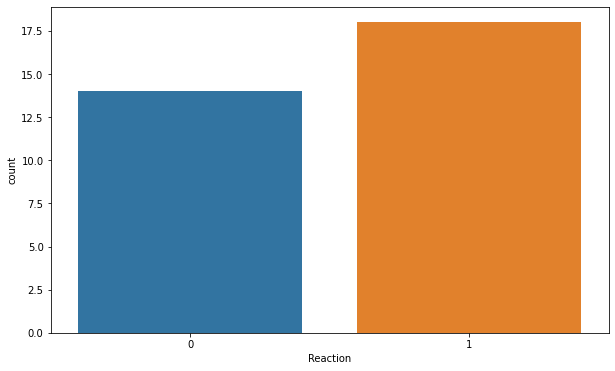

In [ ]:
dims = (10,6)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(data=data, x="Reaction", ax=ax)

In [ ]:
#list of all possible stop words
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#clean the dataset before feeding it to BoW

def filter_data(data):
  filtered_content = []
  lines = data["Content"].values.tolist()

  for text in lines:
    text = text.lower()
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    tokens = word_tokenize(text)
    
    table = str.maketrans('','', string.punctuation)
    stripped_content = [w.translate(table) for w in tokens]
    words = [word for word in stripped_content if word.isalpha()]

    stop_words = set(stopwords.words("english"))
    stop_words.discard("not")

    porter_stemmer = PorterStemmer()
    words = [porter_stemmer.stem(w) for w in words if not w in stop_words]
    words = ' '.join(words)

    filtered_content.append(words)
    return filtered_content

filtered_content = filter_data(data)
filtered_content[0:15]

['neg insipid enough caus regret anoth hour life wast front screen']

In [ ]:
#METHOD 1: USING CountVectorizer
# this module tracks all the words in a corpus and stores their frequency as a one dimensional feature vector for every single corpus

from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(min_df=1)       #the parameter indicates considering all those words which have at least 1 occurences in the corpus
X_dim = count_vec.fit_transform(filtered_content).toarray()
y_dim = data[["Reaction"]].to_numpy()

print(np.shape(X_dim))
print(np.shape(y_dim))

(1, 11)
(32, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dim, y_dim, test_size=0.2, random_state=0)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)